<a href="https://colab.research.google.com/github/TeoHockXiang/hand-gesture-detection/blob/main/hand_gesture_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install OpenCV and MediaPipe
!pip install opencv-python mediapipe


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 18.2 MB/s eta 0:00:00


In [2]:
from google.colab import files
uploaded = files.upload()


Saving hand gesture.jpg to hand gesture.jpg


Saving hand gesture 2.jpg to hand gesture 2 (3).jpg


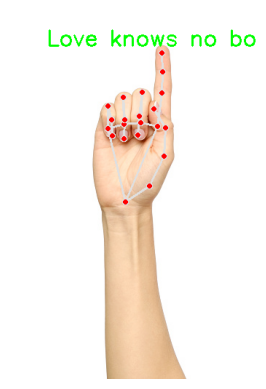

In [9]:
# Install the required libraries
!pip install opencv-python mediapipe

import cv2
import mediapipe as mp
import random
from google.colab import files

# Upload your image file
uploaded = files.upload()

# Define the list of positive statements
positive_statements = [
    "Kindness is the greatest.",
    "Peace begins with a smile.",
    "Compassion is the key to a better world.",
    "Love knows no boundaries.",
    "Harmony is the strength of humanity.",
    "Caring for others is the ultimate form of self-care.",
]

# Initialize MediaPipe Hand module
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

# Initialize Hand Detection
hands = mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.7)

# Load the uploaded image
image_path = list(uploaded.keys())[0]  # Get the filename of the uploaded image
image = cv2.imread(image_path)

# Convert the BGR image to RGB (MediaPipe uses RGB images)
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Process the image and get hand landmarks
results = hands.process(rgb_image)

# Check if any hands are detected
if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        # Draw hand landmarks on the image
        mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

        # Check gesture based on landmark positions (simple example: open hand gesture)
        # For simplicity, we consider a basic open hand gesture based on landmarks
        # This is just an example and can be expanded to other gestures

        # Checking if the hand is open (check distances between specific landmarks)
        # Landmark 5 (thumb tip), 9 (index tip), and 13 (middle tip)
        thumb_tip = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP]
        index_tip = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP]
        middle_tip = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP]

        # Calculate distance between thumb and index finger tips to determine if hand is open
        thumb_index_dist = ((thumb_tip.x - index_tip.x) ** 2 + (thumb_tip.y - index_tip.y) ** 2) ** 0.5
        index_middle_dist = ((index_tip.x - middle_tip.x) ** 2 + (index_tip.y - middle_tip.y) ** 2) ** 0.5

        # If both distances are large enough, consider the hand open
        if thumb_index_dist > 0.15 and index_middle_dist > 0.15:
            # Display a random positive statement when an open hand is detected
            statement = random.choice(positive_statements)
            cv2.putText(image, statement, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

# Display the processed image in Colab
from matplotlib import pyplot as plt

# Convert the image to RGB for display in Colab
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with landmarks and the random statement
plt.imshow(image_rgb)
plt.axis('off')  # Hide the axes
plt.show()
